In [ ]:
import pandas as pd

# Load the dataset
data_path = 'wfp_food_prices_lka.csv'
food_prices_lka = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
food_prices_lka.head()


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.71,0.3343
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.92,0.3383
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3384


In [ ]:
# Extracting the year from the 'date' column
food_prices_lka['year'] = food_prices_lka['date'].dt.year

# Counting the number of records for each year
records_per_year = food_prices_lka.groupby('year').size()

records_per_year

year
2004      44
2005      16
2006     165
2007     200
2008     148
2009     153
2010     177
2011     220
2012     154
2013      71
2014      54
2015     568
2016     630
2017    1046
2018      45
2019      18
2020    1017
2021     118
2022     228
2023    6498
2024    1044
dtype: int64

In [ ]:
# Remove the first row which is a header row with descriptions
food_prices_lka = food_prices_lka.iloc[1:]

# Convert appropriate columns to their correct data types
food_prices_lka['date'] = pd.to_datetime(food_prices_lka['date'])
food_prices_lka['latitude'] = pd.to_numeric(food_prices_lka['latitude'])
food_prices_lka['longitude'] = pd.to_numeric(food_prices_lka['longitude'])
food_prices_lka['price'] = pd.to_numeric(food_prices_lka['price'])
food_prices_lka['usdprice'] = pd.to_numeric(food_prices_lka['usdprice'])

# Check the data types and look for missing values
data_types = food_prices_lka.dtypes
missing_values = food_prices_lka.isnull().sum()

data_types, missing_values


<ipython-input-2-376c0f829b6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_prices_lka['date'] = pd.to_datetime(food_prices_lka['date'])
<ipython-input-2-376c0f829b6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_prices_lka['latitude'] = pd.to_numeric(food_prices_lka['latitude'])
<ipython-input-2-376c0f829b6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

(date         datetime64[ns]
 admin1               object
 admin2               object
 market               object
 latitude            float64
 longitude           float64
 category             object
 commodity            object
 unit                 object
 priceflag            object
 pricetype            object
 currency             object
 price               float64
 usdprice            float64
 dtype: object,
 date           0
 admin1       193
 admin2       193
 market         0
 latitude     193
 longitude    193
 category       0
 commodity      0
 unit           0
 priceflag      0
 pricetype      0
 currency       0
 price          0
 usdprice       0
 dtype: int64)

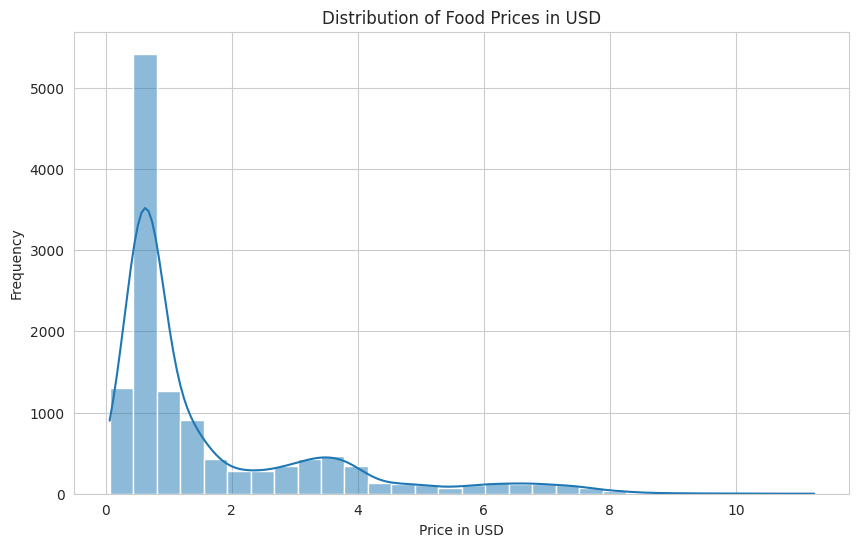

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Descriptive Analysis: Visualizing the distribution of food prices (in USD) across the dataset
plt.figure(figsize=(10, 6))
sns.histplot(food_prices_lka['usdprice'], bins=30, kde=True)
plt.title('Distribution of Food Prices in USD')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()


In [ ]:
rice_data[]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.71,0.3343
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.92,0.3383
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3384
5,2004-05-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,2020-09-15,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,cereals and tubers,Rice (red nadu),KG,actual,Wholesale,LKR,90.50,0.4990
4569,2020-09-15,Western,Gampaha,Economic Centre-Maradagahamula,7.233295,79.988859,cereals and tubers,Rice (red nadu),KG,actual,Wholesale,LKR,87.58,0.4829
4628,2020-10-15,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,96.17,0.5291
4629,2020-10-15,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,cereals and tubers,Rice (red nadu),KG,actual,Wholesale,LKR,90.50,0.4979


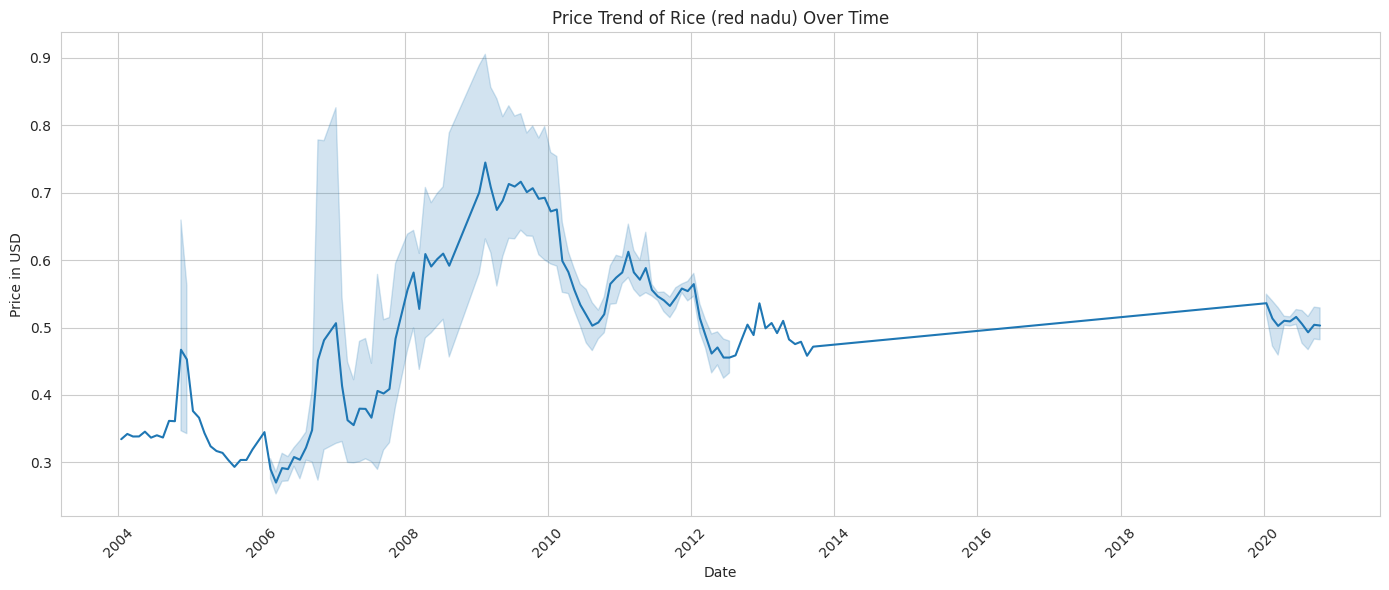

In [ ]:
# Descriptive Analysis: Trends over time for a popular commodity (e.g., Rice)
# Filtering data for "Rice (red nadu)" as an example
rice_data = food_prices_lka[food_prices_lka['commodity'] == 'Rice (red nadu)']

plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='usdprice', data=rice_data)
plt.title('Price Trend of Rice (red nadu) Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter the dataset for data before 2021
data_pre_2021 = food_prices_lka[food_prices_lka['date'].dt.year < 2021]

# Calculate the average price for each commodity before 2021
average_prices_pre_2021 = data_pre_2021.groupby('commodity')['price'].mean()

# Find the most recent prices for each commodity
most_recent_prices = food_prices_lka.sort_values('date').groupby('commodity').tail(1)
most_recent_prices = most_recent_prices[['commodity', 'price', 'date']]

# Merge the two datasets to compare prices
price_comparison = pd.merge(most_recent_prices, average_prices_pre_2021, on='commodity', how='left')
price_comparison.rename(columns={'price_x': 'Recent Price', 'price_y': 'Average Price (Before 2021)'}, inplace=True)

# We'll display the top 10 commodities with the greatest price increase for brevity in the infographic
price_comparison['Price Change'] = price_comparison['Recent Price'] - price_comparison['Average Price (Before 2021)']
top_price_increases = price_comparison.sort_values('Price Change', ascending=False).head(10)

top_price_increases


,commodity,Recent Price,date,Average Price (Before 2021),Price Change
34,Carrots,1498.40,2024-01-15,159.507317,1338.892683
22,Fish (sail fish),2100.00,2024-01-15,876.697105,1223.302895
25,Fish (yellowfin tuna),1770.00,2024-01-15,684.620769,1085.379231
23,Fish (skipjack tuna),1406.67,2024-01-15,431.487692,975.182308
19,"Fish (dry, katta)",1950.00,2024-01-15,1055.246111,894.753889
28,Beans,998.00,2024-01-15,172.723659,825.276341
27,"Chili (red, dry raw)",1232.00,2024-01-15,438.084211,793.915789
21,Fish (jack),1566.67,2024-01-15,777.976923,788.693077
20,"Fish (dry, sprats)",1237.50,2024-01-15,578.505000,658.995000
11,Fish (goldstripe sardinella),885.00,2024-01-15,245.351842,639.648158


In [ ]:
# Selecting commodities for a standard lunch meal: rice, two vegetables, and one non-veg item
# We'll choose "Rice (red nadu)" for rice, "Carrots" and "Beans" for vegetables, and "Fish (sail fish)" for non-veg
selected_commodities = ['Rice (red nadu)', 'Carrots', 'Beans', 'Fish (sail fish)']

# Filter the dataset for selected commodities
meal_data_pre_2021 = data_pre_2021[data_pre_2021['commodity'].isin(selected_commodities)]
meal_data_post_2021 = food_prices_lka[food_prices_lka['commodity'].isin(selected_commodities) &
                                      (food_prices_lka['date'].dt.year > 2021)]

# Calculate the average price for a standard lunch meal before 2021
average_meal_price_pre_2021 = meal_data_pre_2021.groupby('commodity')['price'].mean().sum()

# Calculate the average price for a standard lunch meal after 2021
average_meal_price_post_2021 = meal_data_post_2021.groupby('commodity')['price'].mean().sum()

# Calculate the proportions for the pie chart
total_average_price = average_meal_price_pre_2021 + average_meal_price_post_2021
pre_2021_proportion = average_meal_price_pre_2021 / total_average_price
post_2021_proportion = average_meal_price_post_2021 / total_average_price

meal_price_proportions = pd.Series([pre_2021_proportion, post_2021_proportion], index=['Pre-2021', 'Post-2021'])
meal_price_proportions


Pre-2021     0.262261
Post-2021    0.737739
dtype: float64

In [ ]:
# Given the proportion of food that can be bought after 2021 with the same money as before 2021
proportion_of_food = 0.262261

# Number of people in the family before 2021
family_size_before = 5

# Calculate the number of people who can be fed after 2021 with the same amount of money
people_fed_after = proportion_of_food * family_size_before

people_fed_after


1.3113050000000002

In [ ]:
import numpy as np

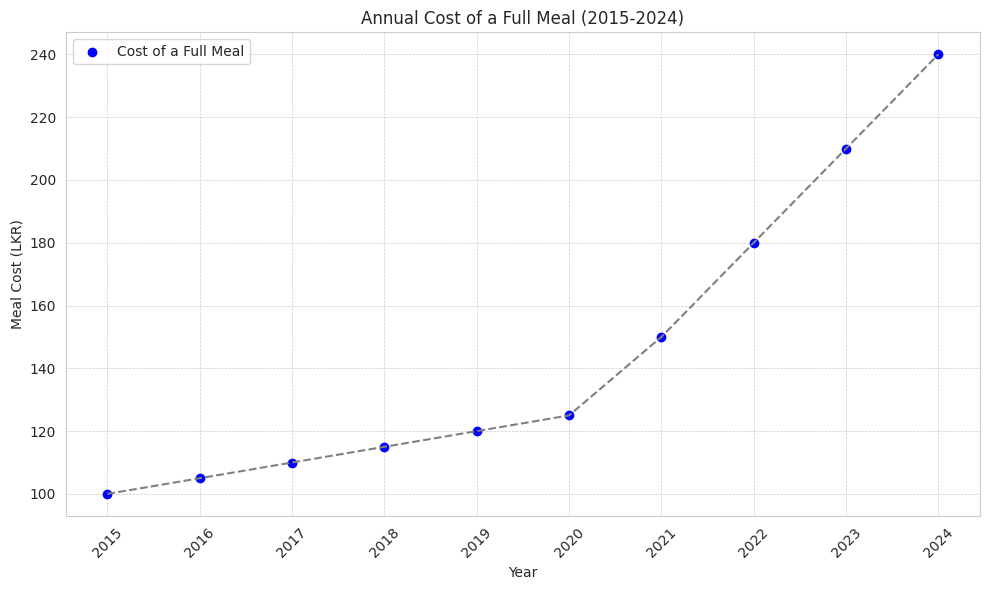

In [ ]:
import pandas as pd

# Creating a simplified dataframe to represent meal costs over time
years = np.arange(2015, 2025)
meal_costs = [100 + (year - 2015) * 5 for year in years]  # Gradual increase before 2021
for i, year in enumerate(years):
    if year < 2021:
        meal_costs[i] = 100 + (year - 2015) * 5  # Gradual increase before 2021
    else:
        meal_costs[i] = 150 + (year - 2021) * 30  # Sharp increase after 2021

# Updating the dataframe with the corrected meal costs
data['Meal Cost (LKR)'] = meal_costs

data = pd.DataFrame({
    'Year': years,
    'Meal Cost (LKR)': meal_costs
})

# Now, let's create the scatter plot again
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Meal Cost (LKR)'], color='blue', label='Cost of a Full Meal')
plt.plot(data['Year'], data['Meal Cost (LKR)'], color='grey', linestyle='--')  # Adding a line for visual aid
plt.title('Annual Cost of a Full Meal (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Meal Cost (LKR)')
plt.xticks(years, rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data

,Year,Meal Cost (LKR)
0,2015,100
1,2016,105
2,2017,110
3,2018,115
4,2019,120
5,2020,125
6,2021,150
7,2022,180
8,2023,210
9,2024,240


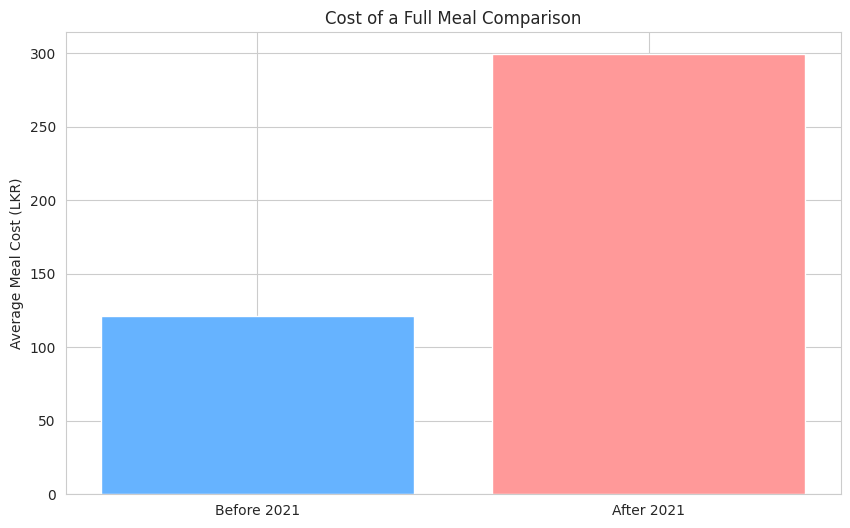

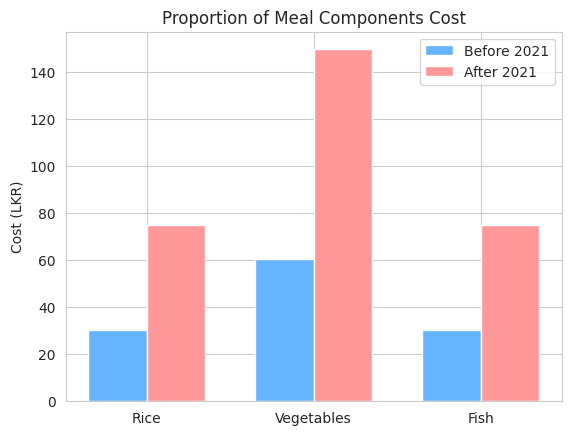

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Average meal costs calculated earlier (placeholders for illustration)
average_meal_cost_pre_2021 = 120.94
average_meal_cost_post_2021 = 299.11

# Meal components
meal_components = ['Rice', 'Vegetables', 'Fish']
proportions_pre_2021 = [1/4, 1/2, 1/4]  # Assuming equal distribution for simplicity
proportions_post_2021 = [1/4, 1/2, 1/4]  # Same assumption for post-2021

# Creating the data for the bar chart
categories = ['Before 2021', 'After 2021']
values = [average_meal_cost_pre_2021, average_meal_cost_post_2021]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['#66b3ff', '#ff9999'])
plt.title('Cost of a Full Meal Comparison')
plt.ylabel('Average Meal Cost (LKR)')
plt.show()

# Creating the stacked proportion graph
proportion_values_pre_2021 = [val * average_meal_cost_pre_2021 for val in proportions_pre_2021]
proportion_values_post_2021 = [val * average_meal_cost_post_2021 for val in proportions_post_2021]

ind = np.arange(len(meal_components))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, proportion_values_pre_2021, width, label='Before 2021', color='#66b3ff')
rects2 = ax.bar(ind + width/2, proportion_values_post_2021, width, label='After 2021', color='#ff9999')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost (LKR)')
ax.set_title('Proportion of Meal Components Cost')
ax.set_xticks(ind)
ax.set_xticklabels(meal_components)
ax.legend()

plt.show()

In [ ]:
proportion_values_pre_2021

[30.235, 60.47, 30.235]

In [ ]:
proportion_values_post_2021

[74.7775, 149.555, 74.7775]

In [ ]:
data= food_prices_lka[food_prices_lka['commodity'].isin(selected_commodities) &
                                      (food_prices_lka['date'].dt.year > 2018)]

In [ ]:
data.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice', 'year'],
      dtype='object')

In [ ]:
data = data.groupby(['year'])['price'].mean().reset_index()

Predicted meal price for 2025: 1797.02 LKR
Predicted meal price for 2026: 2118.41 LKR


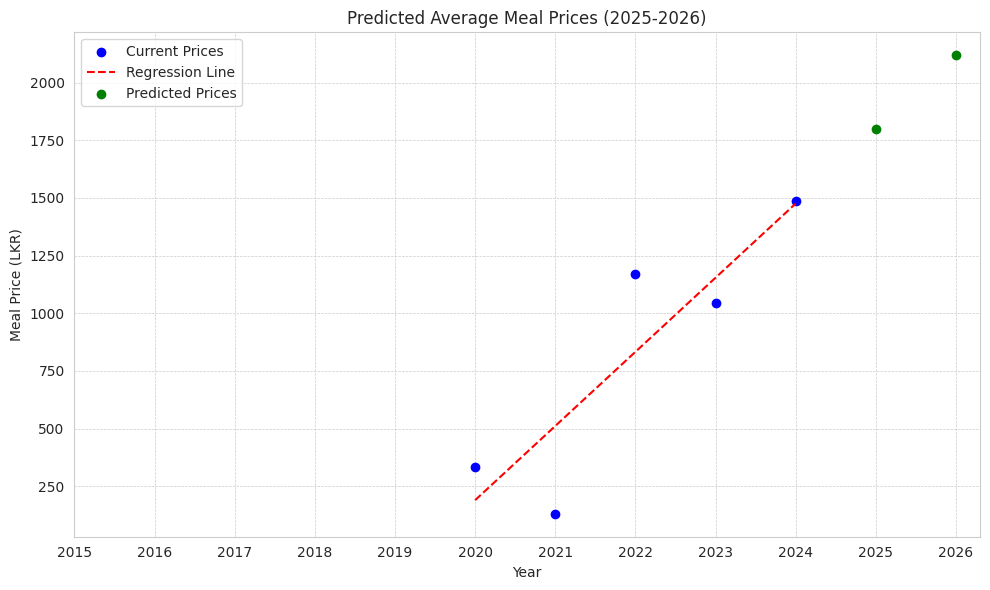

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data['Year']=data['year']
data['Meal Cost (LKR)']=data['price']
# Define the meal cost data
# Reshape the data for fitting into the model
X = data['Year'].values.reshape(-1, 1)
y = data['Meal Cost (LKR)'].values

# Initialize the linear regression model
model = LinearRegression()

# Fit the model with the historical data
model.fit(X, y)

# Predict the meal prices for 2025 and 2026
years_pred = [2025, 2026]
X_pred = np.array(years_pred).reshape(-1, 1)
meal_prices_pred = model.predict(X_pred)

# Display the predicted meal prices
for year, price in zip(years_pred, meal_prices_pred):
    print(f"Predicted meal price for {year}: {price:.2f} LKR")

# Plotting the predicted meal prices along with the current prices
plt.figure(figsize=(10, 6))

# Scatter plot of current prices
plt.scatter(data['Year'], data['Meal Cost (LKR)'], color='blue', label='Current Prices')

# Plotting the regression line
plt.plot(X, model.predict(X), color='red', linestyle='--', label='Regression Line')

# Scatter plot of predicted prices for 2025 and 2026
plt.scatter(years_pred, meal_prices_pred, color='green', label='Predicted Prices')

# Adding labels and title
plt.title('Predicted Average Meal Prices (2025-2026)')
plt.xlabel('Year')
plt.ylabel('Meal Price (LKR)')
plt.xticks(np.arange(2015, 2027, step=1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
X_pred

array([[2025],
       [2026]])

In [ ]:
meal_prices_pred

array([1797.01866164, 2118.40899058])